<a href="https://colab.research.google.com/github/KPatienceJ/ShowTimeProject/blob/main/SLF_AdditionalProject_LearnerNotebook_FullCode_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations: ShowTime
**Marks: 60**

## Context
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

## Objective
ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

## Data Description
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary**

- visitors: Number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content

# Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To carry out randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Overview
*   Observations
*   Sanity checks




**Loading data**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PG Data Science and Business Analytics/Supervised Learning /Course Assignment /ottdata.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Displaying first and last few rows of the data frame**

In [ ]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
df.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


**Understanding the shape of the data set.**

In [ ]:
# Checking the shape of the data set
print("The data set has", df.shape[0], 'rows and', df.shape[1], "columns." )

The data set has 1000 rows and 8 columns.


The data set contains informmation in 15 rows about visitors to the ShowTime platform.

**Understanding the data types of the column in the data set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB




*   The data set has 8 columns and 1000 rows. There are no missing rows/information as every column has 1000 rows.
*   There are 5 numerical columns (float and integer) and 7 string (objective type) columns.
*   The target variable is views_content, which is a float.








**Checking for missing values in data**

In [ ]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


*   There are no missing values in the data set.


**Checking for duplicate entries in the data**

In [ ]:
df.duplicated().sum()

0


*   There are no duplicate entries in this data set.




**Checking the statistical summary of the data**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89




*   The average number of first-day views in a day 0.473 million, with the highest number in a day at 0.89 million and lowest at 0.22 million.
*   The average number of visitors to the platform in the previous week is 1.7 million.
*   Ad spend across all ad campaigns led to average ad impressions of 1434.7 million. The highest ad impressions driven by ad campaigns was 2424.20 million and lowest was 1010.87.
*   The number of major sports events on a given day was between 1 and 0.
*   Trailer views range between 30.08 million to 57.76 million, with average trailer views at 66.91 million.








**Checking the count and percentage of categorical levels in the categorical columns**

In [ ]:
cat_cols = ['genre', 'dayofweek', 'season']
# Printing the count of unique categorical levels in each column
for column in cat_cols:
  print(df[column].value_counts())


Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: genre, dtype: int64
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: dayofweek, dtype: int64
Winter    257
Fall      252
Spring    247
Summer    244
Name: season, dtype: int64




*   Others, Comedies and Thrillers are the 3 top viewed genres while Action and Horrors are the least viewed.
*   Content is mainly released on Fridays and Wednesdays.
*   Overall, there isn't that much difference regarding the amount of content released from season to season. Winter and Fall have slightly more content released compared to Spring and Summer.







# Exploratory Data Analysis (EDA)


*   EDA is an important part of any project involving data.
*   It is important to investigate and understand the data better before building a model with it.
*   A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
*   A thorough analysis of the data, in addition to the questions mentioned below, should be done.





**Questions:**


1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?



**Carrying out Univariate Analysis**

*Observation on genre*

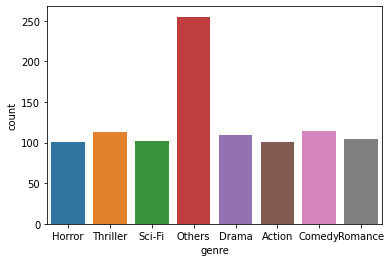

In [ ]:
sns.countplot(data=df,x='genre')
# plt.xtricks(rotation=90)
plt.show()



*   Apart from the genre Others, the remaining genres are watched at roughly the same rate, with thriller, drama and comedy having a slightly higher watch rate.
*   The genre others has over double the watch rate of all other genres. It would be interesting to know what genres fall within 'Others' and what their watch rate is compared to the 7 genres named. 




*Observation on day of the week*

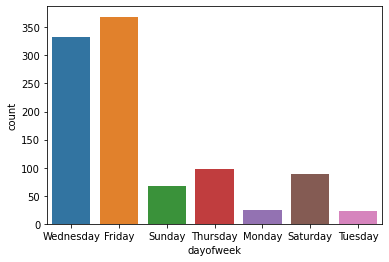

In [ ]:
sns.countplot(data=df,x='dayofweek')
# plt.xtricks(rotation=90)
plt.show()



*   Wednesday and Friday have the highest amount of content released and least amount released on Monday and Tuesday. 



*Observation on release*

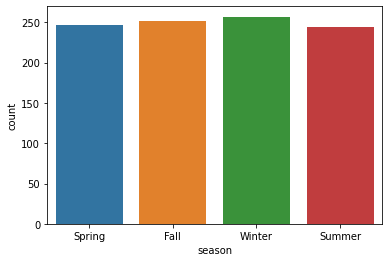

In [ ]:
sns.countplot(data=df,x='season')
# plt.xtricks(rotation=90)
plt.show()



*   In general, the same amount of content is released in each season, with winter having slightly higher content released compared to other seasons and summer having slightly less content released compared to other seasons.



*Observation on major sports events*

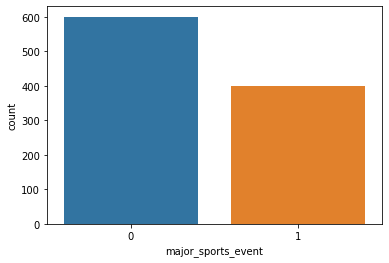

In [ ]:
sns.countplot(data=df,x='major_sports_event')
# plt.xtricks(rotation=90)
plt.show()



*   There are more days with no major sports events compared to days with major sports events. 



*Observation on ad visitors*

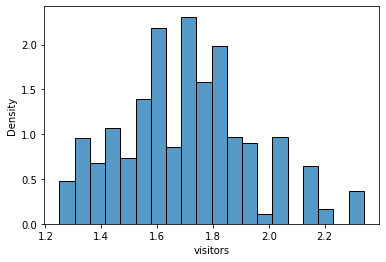

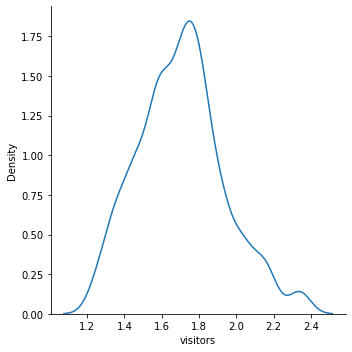

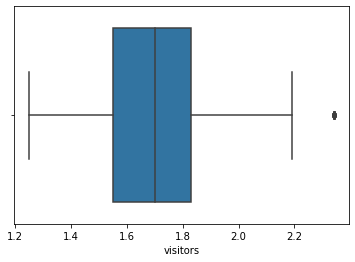

In [ ]:
sns.histplot(data=df,x='visitors',stat='density')
plt.show()
sns.displot(data=df,x='visitors',kind='kde')
plt.show()
sns.boxplot(data=df,x='visitors')
plt.show()




*   The visitors distribution is slightly skewed to the right with median visits at around 1.7 million and few outliers.



*Observation on ad impressions*

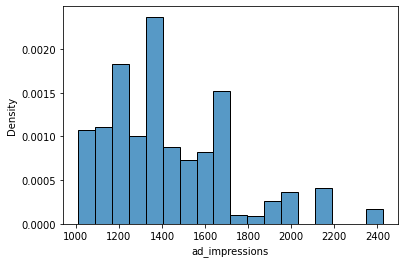

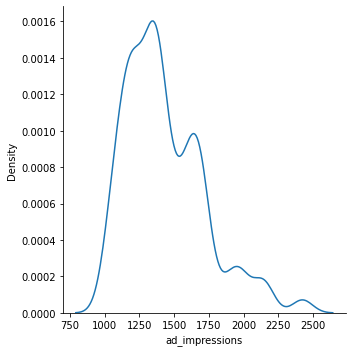

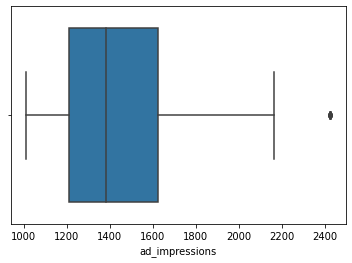

In [ ]:
sns.histplot(data=df,x='ad_impressions',stat='density')
plt.show()
sns.displot(data=df,x='ad_impressions',kind='kde')
plt.show()
sns.boxplot(data=df,x='ad_impressions')
plt.show()



*   The ad impression distribution is skewed to the right, with a median that slightly less than 1400. There are a few outliers with ad impressions reaching 2400 million.



*Observations on views trailer*

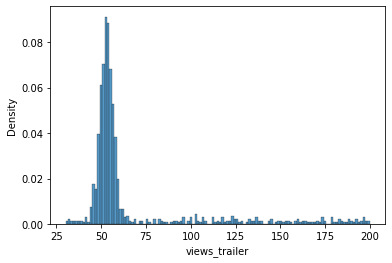

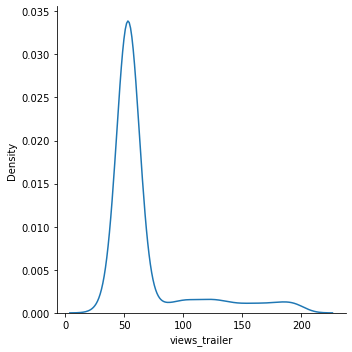

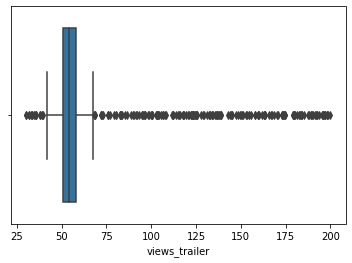

In [ ]:
sns.histplot(data=df,x='views_trailer',stat='density')
plt.show()
sns.displot(data=df,x='views_trailer',kind='kde')
plt.show()
sns.boxplot(data=df,x='views_trailer')
plt.show()



*   The view_trailer is skewed to the right, with median trailers view higher than 50 million. Views has many outliers, both above the 75th percentile and less than the 25th percentile.




*Observations on views content*

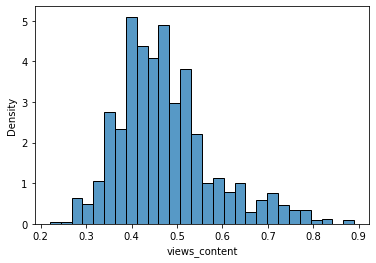

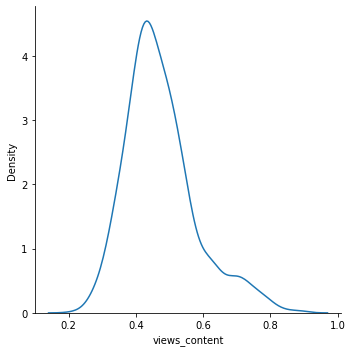

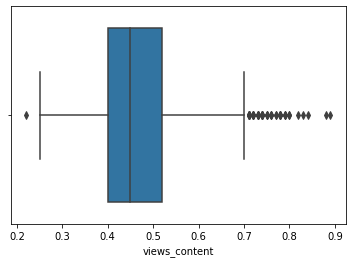

In [ ]:
sns.histplot(data=df,x='views_content',stat='density')
plt.show()
sns.displot(data=df,x='views_content',kind='kde')
plt.show()
sns.boxplot(data=df,x='views_content')
plt.show()



*   Content views is slightly skewed to the right, with a median that slightly higher than 0.4 million. It has outliers, with 0.9 million views on the first day.




**Carrying out Bivariate Analysis**

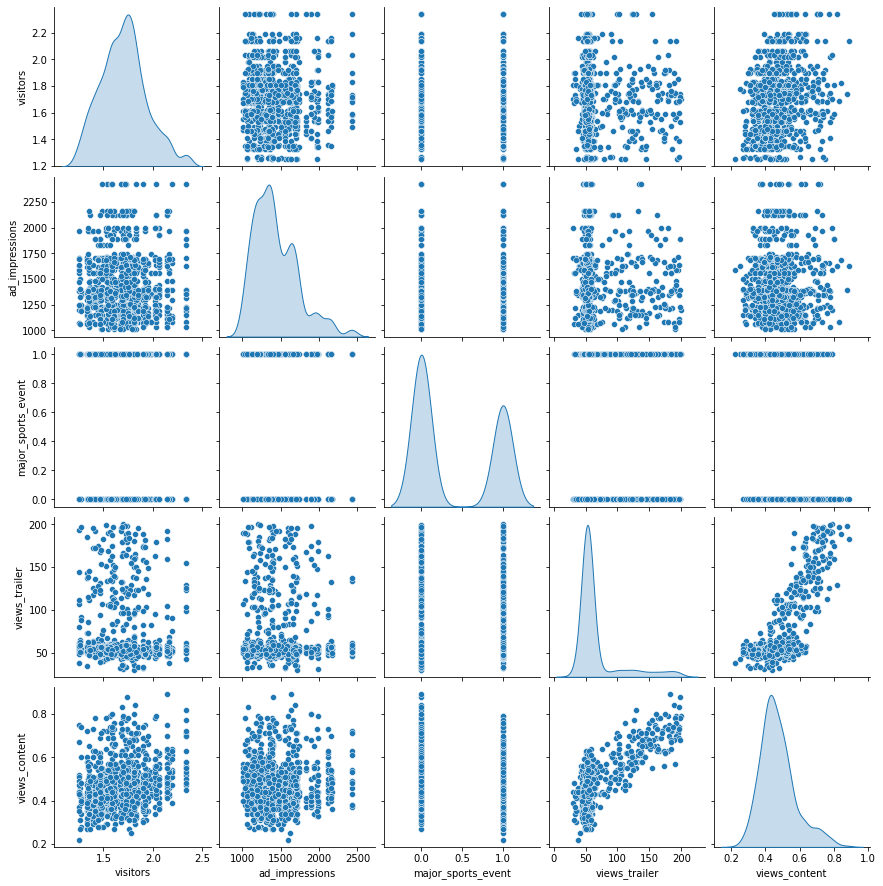

In [ ]:
df_attr = df.iloc[:, 0:9]
sns.pairplot(
    df_attr, diag_kind="kde"
) # This is to plot density curve instead of histogram on the diag



*  There is a positive correlation between views_trailer and views_content, therefore the higher the number of times trailers are viewed, the higher the number of first_day views.  



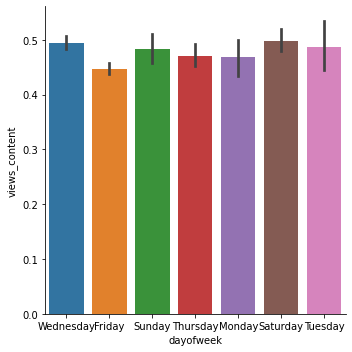

In [ ]:
# Observing the relationship between day of release and viewership
sns.catplot(x='dayofweek', y='views_content', data=df, kind='bar');

Saturday and Wednesday have the highest first-day views, with Sunday and Tuesday a close second. Friday has the lowest first-day viewership numbers.

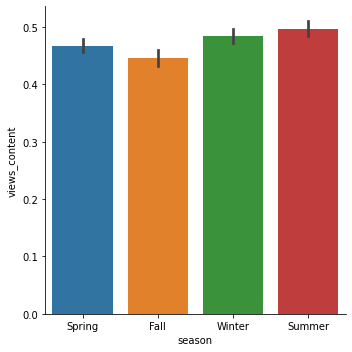

In [ ]:
# Observing the relationship between viewership and season of release
sns.catplot(x='season', y='views_content', data=df, kind='bar');

Summer has the highest first day viewership numbers amongst the seasons with fall as the lowest yet the lowest amount of new content is released in summer. ShowTime should look into switching this up, with summer getting a higher number of releases. 

# Data Preprocessing


- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)


In [ ]:
# Checking for missing values
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64



*   There are no missing values.



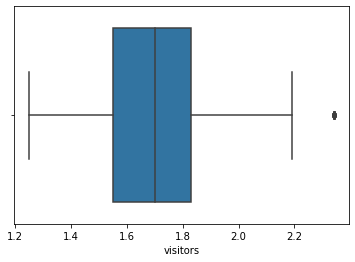

In [ ]:
# Outliers
sns.boxplot(data=df,x='visitors')
plt.show()

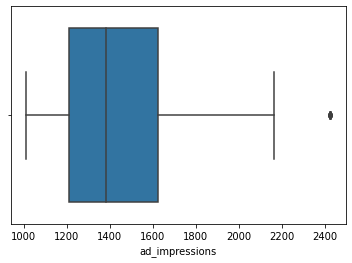

In [ ]:
sns.boxplot(data=df,x='ad_impressions')
plt.show()

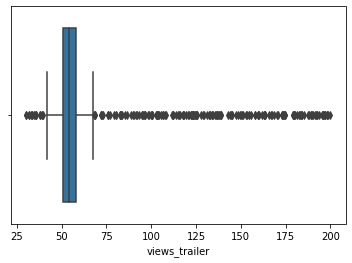

In [ ]:
sns.boxplot(data=df,x='views_trailer')
plt.show()

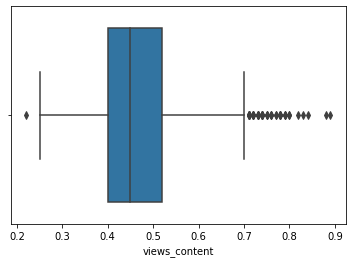

In [ ]:
sns.boxplot(data=df,x='views_content')
plt.show()



*   All numerical categories have outliers, with views_trailer and views_content having the most outliers. However, we will not be treating these outliers as they are proper values.




**Preparing data for modelling**



*   We want to determine the driver variables for first-day content viewership. Therefore, we want to predict first-day content viewership. 
*   To prepare data for modelling, we will begin by encoding the categorical variables.

*   We will then split the data into train and test sets so that we can effective evaluate the model we are going to build on the training data.
*   We will build a linear regression model on the train data and then check its performance.





In [ ]:
# Defining X and y variables
X = df.drop(["views_content"], axis=1)
y = df["views_content"]
print(X.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [ ]:
# Adding the intercept to data
X = sm.add_constant(X)

In [ ]:
# Creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.0,1.46,1498.41,1,52.69,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,1.47,1079.19,1,48.74,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,1.85,1342.77,1,49.81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.46,1498.41,0,55.83,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


# EDA
- It is a good idea to explore the data once again after manipulating it.

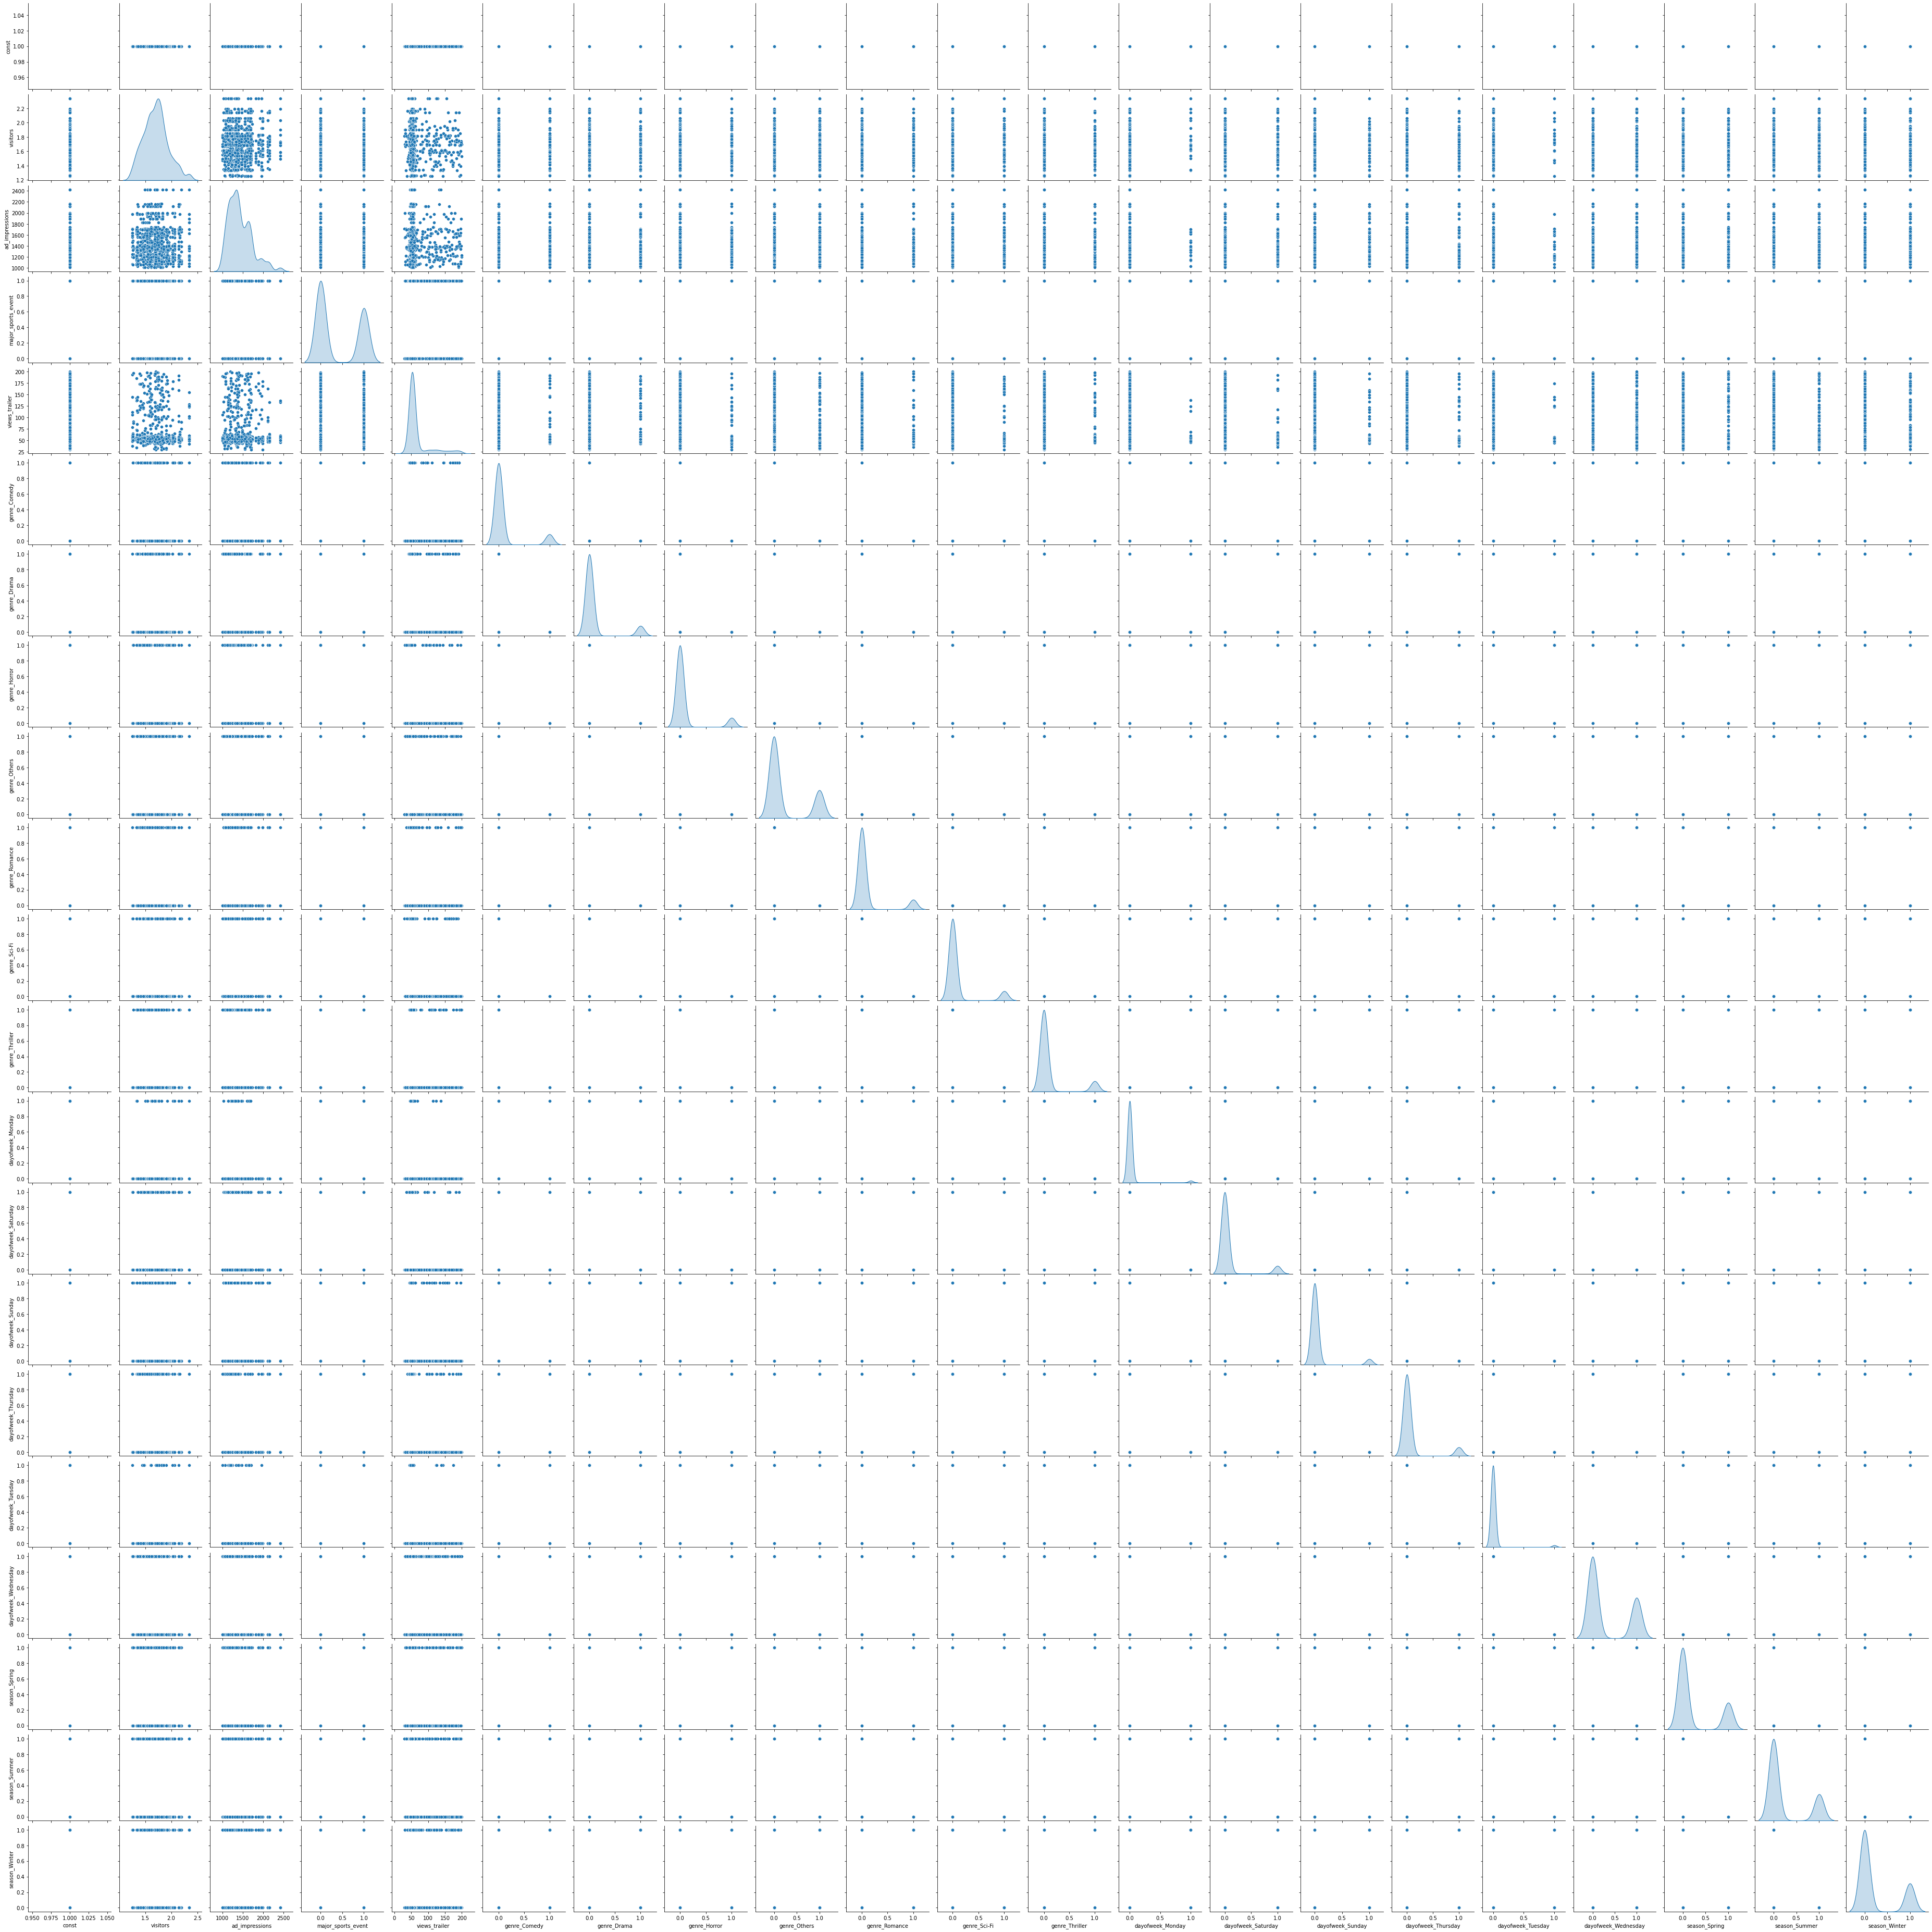

In [ ]:
X_attr = X.iloc[:, 0:35]
sns.pairplot(
    X_attr, diag_kind="kde"
)

# Building a Linear Regression model

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.32e-215
Time:                        20:08:01   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    



*   At 0.785, the adjusted R-squared is closer to 1, and therefore we can conclude that it indicates a good fit, assuming other factors are constant.
*   The value of the constant coefficient is 0.0602. This will be our expected output, if all predictor variable coefficient was 0.






# Model performance evaluation


* We will evaluate the performance of the model using metric functions defined in sklearn for RMSE, MAE and R squared





In [ ]:
# Creating a function to print out the above metrics at a go

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:



# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464




*   At a training 𝑅2 of 0.79, we can say that the model is not underfitting
*   We can also say that the model isn't overfitting as the train and test RMSE and MAE has small discrepancies.

*   The model can predict first day viewership with a mean error of 0.04.





# Checking Linear Regression Assumptions
- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Checking linear regression assumptions**

Test for multicollinearity. We will use Variance Inflection Factor method to test for multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525




*   There are no columns with VIF higher than 5, therefore we conclude that there's no multicollinearity. Next, we will look at the p-value for predictor variables to check their significance. 



**Dealing with high p-value**



*   When we look at our model, we observe that some variables have p-values greater than 0.05. This shows that they are not really significant and so we will drop them. We will use a loop to drop multiple variables at once.



In [ ]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [ ]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train1).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          7.03e-224
Time:                        22:50:16   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    



*   Now, we can see that there are no p-values greater than 0.05.



**Test for linearity and independence**

We are going to check for linearity and independence of assumptions using fitted versus actual values of the residuals.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


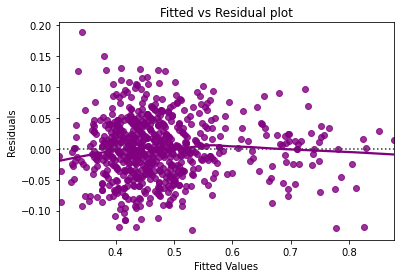

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()



*   The scatterplot shows no pattern, therefore we will conclude that the assumption of linearity and independence are satisfied.



**Test for normality**

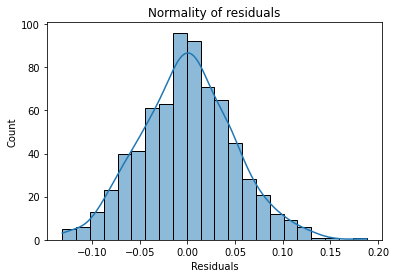

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()



*   The histogram for residuals has a bell-shaped curve
*   Next, we will check the Q-Q plot



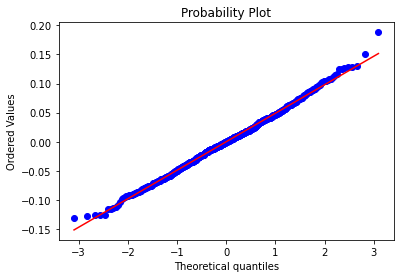

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()



*   The residuals follow a straight line, including the tail.
*   Next, we will check the Shapiro-Wilk test



In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)



*   Since the p-value is greater than 0.05, we will say that the residuals have a normal distribution, therefore, the assumption is satisfied.



**Test for homoscedacity**

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.1313612904200752), ('p-value', 0.12853551819087372)]





*   Since the p-value is greater than 0.05, we will conclude that the residuals are homoscedastic and therefore that the assumption is satisfied.





**Prediction on the test data set**

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test1)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155




*   Looking at our model, we can say that the actual and predicted values are good and comparable.



# Final Model Summary

In [ ]:
x_train_final = x_train1.copy()
x_test_final = x_test1.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          7.03e-224
Time:                        23:57:20   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


*   At a training 𝑅2 of 0.79, we can say that the model is not underfitting and can explain 79% of variation in the data.
*   We can also say that the model isn't overfitting as the train and test RMSE and MAE has small discrepancies.

*   The MAPE on the test shows that the model can predict within 9.2% of views_content.

# Actionable Insights and Recommendations
-



*   The model is good andn can be used for prediction. This is because it explains 79% of the variation in data and within 9% of views_count on the test data.
*   Increase in number of visitors by one unit will lead to increase in first day views by 0.01291 units, all other variables held constant.

*    Increase in sports events by one unit will lead to decline in first day views by 0.0606 units, all other variables held constant.
*   Increase in trailor views by one unit will lead to increase in first day views by 0.00203 units, all other variables held constant.

*   Keep Saturdays and Thursdays as the main content release days. This is because increase in content release on these days by 1 unit leads to the highest increase in first day views, compared to the other days.
*   Summer is an optimal season to release new content as we see that increase in content release by 1 unit in summer leads to increase in first day views by 0.0434, the highest compared to other seasons. 
*   Increase in the number of visitors leads to increase in first day viewership, therefore, increase marketing spend with a focus on effective channels.








